# 데이터 전처리 (Data Preprocessing)   

데이터 분석 모델을 선정하는 것 만큼 어떤 데이터를 입력값으로 가지느냐에 따라 분석 결과는 크게 달라질 수 있으므로 다음과 같은 데이터 전처리 과정이 필요하다. (Garbage In, Garbage Out). 

- 결측치 (Missing Data) 처리
- 데이터 인코딩 (Encoding) 
- 데이터 스케일링 조정 

*본 실습은 파이썬 머신러닝 완벽 가이드(권철민, 위키북스, 2020), 파이썬 라이브러리를 활용한 머신러닝 (A.Mueller & S.Guido, 박해선 역, 한빛미디어, 2019) 교재 참고

In [19]:
# 간단하게 그림을 그릴 수 있는 mglearn 라이브러리 사용 (!pip install mglearn 명령어로 설치)
!pip install mglearn
import mglearn

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

     |████████████████████████████████| 540 kB 5.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=52b7d923b1a4299e3a6c9929f1ef822114a4bc0e2ab496724e751cdc6a935785
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
from sklearn.datasets import load_boston

# csv 데이터 가져오기 (타겟 변수 MEDV: python_basic2.ipynb 의 PRICE와 같은 값임)
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BigMining/BostonHousing_missing.csv")
df.rename(columns = {'MEDV':'PRICE'},inplace=True)
display(df.head())   


,CRIM,ZN,attributeINDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,NaN,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,NaN,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,NaN,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,NaN


In [13]:
display(df.shape) # 행열
display(df.info()) # 데이터타입, null정보등 확인
display(df.isna().sum()) # 결측치 수
display(df.head(10))

(506, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CRIM            502 non-null    float64
 1   ZN              506 non-null    float64
 2   attributeINDUS  506 non-null    float64
 3   CHAS            506 non-null    int64  
 4   NOX             504 non-null    float64
 5   RM              505 non-null    float64
 6   AGE             505 non-null    float64
 7   DIS             505 non-null    float64
 8   RAD             506 non-null    int64  
 9   TAX             505 non-null    float64
 10  PTRATIO         506 non-null    float64
 11  B               506 non-null    float64
 12  LSTAT           504 non-null    float64
 13  PRICE           505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


None

CRIM              4
ZN                0
attributeINDUS    0
CHAS              0
NOX               2
RM                1
AGE               1
DIS               1
RAD               0
TAX               1
PTRATIO           0
B                 0
LSTAT             2
PRICE             1
dtype: int64

,CRIM,ZN,attributeINDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,NaN,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,NaN,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,NaN,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,NaN
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,NaN,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,NaN,15.2,386.71,17.10,18.9


## 결측치 처리
* 데이터를 살펴보고 결측치(Missing Data, Null, NaN)가 많지 않은 경우에는 평균값 등으로 간단히 대체하고, 대부분이 결측치라면 해당 변수를 분석에 사용하지 않는 것이 좋다. 
* 결측치가 어느 정도 이상일때 어떻게 결측치 처리를 해야 하는지에 대해서는 정해진 기준이 없기 때문에, 분석 목적과 데이터 특성 등을 상세히 검토하여 결정해야 한다. 


제거/보간/대체 예. 
- 결측데이터가 너무 많은 경우, 해당 데이터의 행(axis =0) 또는 열(axis =1) 제거
- 결측데이터가 일부인 경우, 가장 그럴듯한 값으로 대체
- 종속변수에 결측이 있으면 보간하지 않고 제거
- 결측치가 비어있지 않고 특수기호, 0  등으로 입력된 경우도 있으므로 반드시 원본 데이터를 확인하고 처리 


In [12]:
print(df.isnull().sum())  #결측치 확인

CRIM              4
ZN                0
attributeINDUS    0
CHAS              0
NOX               2
RM                1
AGE               1
DIS               1
RAD               0
TAX               1
PTRATIO           0
B                 0
LSTAT             2
PRICE             1
dtype: int64


In [17]:
# 1. 결측치 행 전체 삭제
df_drop_row = df.dropna(axis=0)   #열삭제의 경우 axis =1  (또는 특정 개수 이상의 결측치가 있는 경우만 삭제 thresh = 갯수)
print("결측행 모두 제거: ", df_drop_row.shape)    # 결측치 13행 모두 없어졌는지 확인

결측행 모두 제거:  (493, 14)
CRIM              4
ZN                0
attributeINDUS    0
CHAS              0
NOX               2
RM                1
AGE               1
DIS               1
RAD               0
TAX               1
PTRATIO           0
B                 0
LSTAT             2
PRICE             0
dtype: int64


In [15]:
# 2. 종속으로 사용할 집값(PRICE)의 결측치만 행제거 
df = df.dropna(subset = ['PRICE'], axis=0)   

print("\nPRICE 결측만 제거: ", df.shape)  # 결측치 1개만 제거되고, 나머지 변수들에 결측치 존재 확인
print(df.isna().sum()) 


PRICE 결측만 제거:  (505, 14)
CRIM              4
ZN                0
attributeINDUS    0
CHAS              0
NOX               2
RM                1
AGE               1
DIS               1
RAD               0
TAX               1
PTRATIO           0
B                 0
LSTAT             2
PRICE             0
dtype: int64


In [16]:
#3. 보간법

from sklearn.impute import SimpleImputer
# strategy 옵션: mean (기본값), median, most_frequent, constant
# constant 예:  SimpleImputer(strategy='constant', fill_value=1)

imputer = SimpleImputer(strategy = "mean") # mean(평균), median(중앙값), most_frequent(최빈값)등 있음
df_impute = pd.DataFrame(imputer.fit_transform(df)) # imputer쓰면 numpy array로 변환되므로 df로 재변환했음. sklearn에서는 그냥 사용해도됨. 
print("\n평균으로 보간:", df_impute.shape)  
print(df_impute.isna().sum()) 


평균으로 보간: (505, 14)
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64


In [18]:
#4. 대체

# 딕셔너리에서 데이터프레임 생성 
sample_dict = { 'Hist': [10, 20, np.NaN, np.NaN],
                'Finan': [5, np.NaN, np.NaN, 29],
                'Maths': [15, 20, np.NaN, np.NaN],
                'Geog': [21, np.NaN, 18, 18]}
df = pd.DataFrame(sample_dict)
print(df)

# fillna()를 이용하여 결측치 대체 
df['Finan'].fillna(0, inplace=True)
df['Hist'].fillna('test', inplace=True)
df['Maths']= df['Maths'].fillna(df['Maths'].mean())
print(df)

# 모든 결측치를 한번에 11로 변경
# new_df = df.fillna(11)
# print(new_df)

   Hist  Finan  Maths  Geog
0  10.0    5.0   15.0  21.0
1  20.0    NaN   20.0   NaN
2   NaN    NaN    NaN  18.0
3   NaN   29.0    NaN  18.0
   Hist  Finan  Maths  Geog
0  10.0    5.0   15.0  21.0
1  20.0    0.0   20.0   NaN
2  test    0.0   17.5  18.0
3  test   29.0   17.5  18.0


## 데이터 스케일 조정
* 단위가 다른 변수들의 값 범위를 일정한 수준으로 맞추어 주는 작업이다. 
* 다차원 값들을 비교 분석하기 쉽게 만들어 주며, 모델 학습과정에서 0으로 수렴하거나 무한으로 발산해 버릴 수 있는 것을 방지하고 (unverflow, overflow), 최적화 과정에서 안정성 및 수렴 속도를 향상시킨다. 
* 대표적인 스케일 조정 방법 
  * StandardScaler: 데이터 값을 평균 0, 분산 1로 변환 (정규 분포를 가정한 모델에서는 특히 중요 ) 
  * MinMaxScaler: 데이터 값을 0과 1 사이의 범위 값으로 변환 
  

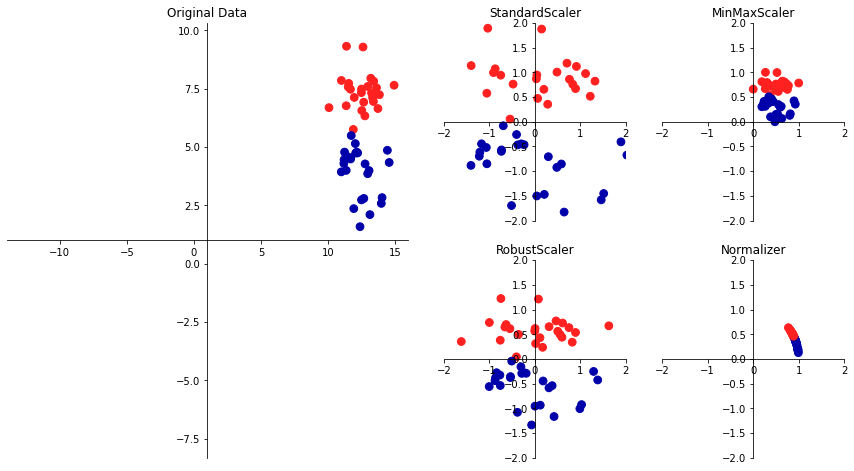

In [20]:
mglearn.plots.plot_scaling()

### StandardScaler

In [60]:
from sklearn.preprocessing import StandardScaler

#pan
pd.options.display.float_format = '{:.3f}'.format  #지수표현 말고, 소수로 찍히게 설정

X = df_impute.iloc[:,0:-1]   #결측치 제거한 Dataframe의 독립변수
y = df_impute.iloc[:, -1]   #결측치 제거한 Dataframe의 종속변수

print("원본: \n", X.describe())

# 평균 0, 표준편차 1로 변환하는 standardscaler 적용
scaler_s = StandardScaler()

# sklearn써서 numpy배열로 바뀐것 dataframe변환
X_s = pd.DataFrame(scaler_s.fit_transform(X)) 

# fit( ) 과 transform( ) 따로 실행 가능   
# scaler.fit(X)
# X_s = scaler.transform(X)

print("\nStandardScaler: \n", X_s.describe())

원본: 
            0       1       2       3       4       5       6       7       8   \
count 505.000 505.000 505.000 505.000 505.000 505.000 505.000 505.000 505.000   
mean    3.647  11.386  11.155   0.069   0.555   6.282  68.576   3.791   9.562   
std     8.603  23.340   6.856   0.254   0.116   0.702  28.163   2.105   8.711   
min     0.006   0.000   0.460   0.000   0.385   3.561   2.900   1.130   1.000   
25%     0.082   0.000   5.190   0.000   0.449   5.885  45.000   2.100   4.000   
50%     0.268   0.000   9.690   0.000   0.538   6.208  77.300   3.199   5.000   
75%     3.678  12.500  18.100   0.000   0.624   6.619  94.100   5.118  24.000   
max    88.976 100.000  27.740   1.000   0.871   8.780 100.000  12.127  24.000   

           9       10      11      12  
count 505.000 505.000 505.000 505.000  
mean  408.800  18.455 356.594  12.645  
std   168.444   2.167  91.368   7.094  
min   187.000  12.600   0.320   1.730  
25%   279.000  17.400 375.330   7.120  
50%   330.000  19.100 39

### MinMaxScaler

In [29]:
from sklearn.preprocessing import MinMaxScaler

# 최소 0, 최대 1로 변환하는 MinMaxScaler적용
scaler_m = MinMaxScaler()
X_m = pd.DataFrame(scaler_m.fit_transform(X))
print("\nMinMaxScaler: \n", X_m.describe())


MinMaxScaler: 
            0       1       2       3       4       5       6       7       8   \
count 505.000 505.000 505.000 505.000 505.000 505.000 505.000 505.000 505.000   
mean    0.041   0.114   0.392   0.069   0.350   0.521   0.676   0.242   0.372   
std     0.097   0.233   0.251   0.254   0.238   0.135   0.290   0.191   0.379   
min     0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
25%     0.001   0.000   0.173   0.000   0.132   0.445   0.434   0.088   0.130   
50%     0.003   0.000   0.338   0.000   0.315   0.507   0.766   0.188   0.174   
75%     0.041   0.125   0.647   0.000   0.492   0.586   0.939   0.363   1.000   
max     1.000   1.000   1.000   1.000   1.000   1.000   1.000   1.000   1.000   

           9       10      11      12  
count 505.000 505.000 505.000 505.000  
mean    0.423   0.623   0.898   0.301  
std     0.321   0.231   0.230   0.196  
min     0.000   0.000   0.000   0.000  
25%     0.176   0.511   0.946   0.149  
50%     0.273

### 학습/시험용 데이터에 적용시 유의사항 
* 가능하면 전체 데이터의 스케일을 조정하고 학습/시험용 데이터로 분리한다.
* 전체 데이터의 스케일 조정이 어렵다면 학습용 데이터에서는 fit_transform() 을 사용하고 시험용 데이터에서는  transform()만 이용


In [39]:
# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

print(train_array)
print(test_array)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


In [48]:
# 최솟값 0, 최댓값 1로 변환하는 MinMaxScaler객체 생성
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)
# 1/10 scale로 train_array 데이터 변환, 원본 10-> 1로 변환
train_scaled = scaler.transform(train_array)
 
print('원본 train_array 데이터:', train_array.reshape(-1))
print('Scale된 train_array 데이터:', train_scaled.reshape(-1))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [52]:
# 잘못된 사례
# 앞에서 생성한 MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5으로 설정됨 
scaler.fit(test_array)  
# 1/5 scale로 test_array 데이터 변환, 원본 5->1로 변환 
test_scaled = scaler.transform(test_array)

# train_array 변환 출력
print('\n---잘못된 사례--')
print('원본 test_array 데이터:', test_array.reshape(-1))
print('Scale된 test_array 데이터:', test_scaled.reshape(-1))


---잘못된 사례--
원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [54]:
# 옳은 사례 
# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함
test_scaled = scaler.transform(test_array)
print('\n---옳은 사례--')
print('원본 test_array 데이터:', test_array.reshape(-1))
print('Scale된 test_array 데이터:', test_scaled.reshape(-1))


---옳은 사례--
원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


### Scaler 선택  
* 데이터 유형에 따라 적절한 Scaler 선택 
* StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, PowerTransformer, QuantileTransformer (uniform output), QuantileTransformer (Gaussian output), Normalizer 
* https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html?highlight=scaler

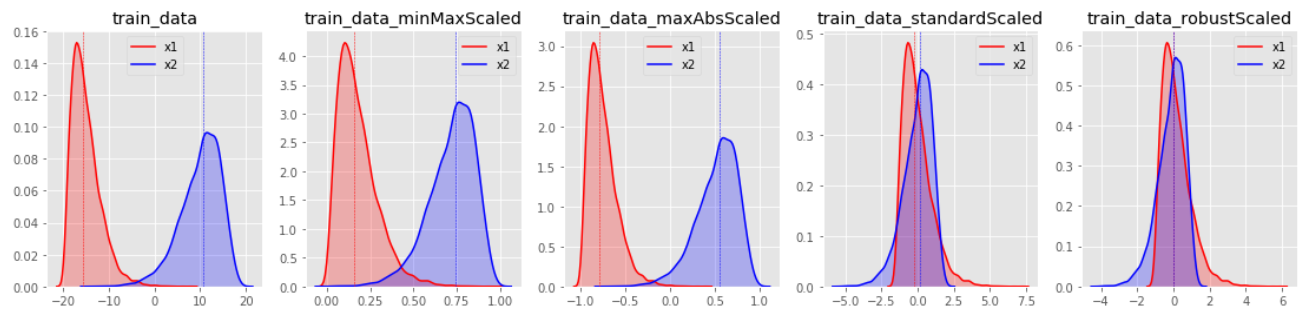

## 데이터 인코딩
scikit-learn의 모델들은 문자열 값을 입력 값으로 허용하지 않기 때문에 모든 문자열 값을 수치형으로 변환(Encoding)해야 한다. 대표적인 인코딩 방법은 다음과 같다. 

* **레이블 인코딩(Label Encoding)**: 
    * 카테고리를 코드형 수치 값으로 변환  
    * 순서가 있는 경우 (상/중/하, 중학교/고등학교/대학교 등 ), 원-핫 인코딩을 이용하기에는 카테고리가 너무 많은 경우 등  
* **원-핫 인코딩(One-Hot Encoding, 더미 변수화)**:      
   * 카테고리별로 새로운 더미 변수를 만들어 1/0으로 표시 
   * 순서가 없는 경우 (국가명 등), 카테고리 개수가 적절한 경우  등
 

### 레이블 인코딩(Label encoding)

In [59]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder()
labels = encoder.fit_transform(items)
#encoder.fit(items)
#labels = encoder.transform(items)

print(items)
print('인코딩 클래스:',encoder.classes_)
print('인코딩 변환값:',labels)

['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']
인코딩 변환값: [0 1 4 5 3 3 2 2]


### 원-핫 인코딩(One-Hot encoding)

In [61]:
from sklearn.preprocessing import OneHotEncoder

# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환 
encoder = LabelEncoder()
labels = encoder.fit_transform(items)
# 2차원 데이터로 변환 
labels = labels.reshape(-1,1)

# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_labels = oh_encoder.fit_transform(labels)
print(items)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [62]:
tb = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
pd.get_dummies(tb)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## 불균형 데이터셋(Imbalanced datasets)
분류 문제에 있어 클래스 비중의 차이가 많이 나는 불균형 데이터의 경우 보정이 필요하다. 
* 한 클래스가 다른 클래스에 비해 훨씬 많을 경우 모델을 만들지 않아도 어느 정도 좋은 성능을 얻을 수 있다. 
* 모델 학습시에 클래스별로 가중치를 부여할 수 있다. (class_weight)


In [58]:
! pip install imblearn

In [66]:
# 데이터셋 설정 (Universal Bank에서 대출 캠페인에 반응한 사람)
# Universal Bank에서 대출 캠페인에 반응한 사람 (종속: Personal Loan, index 7)

df_bank = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BigMining/UniversalBank.csv")
display(df_bank.info())
print(df_bank['PersonalLoan'].value_counts())

y = df_bank['PersonalLoan']
X = df_bank.drop('PersonalLoan', axis =1)
display(X.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Experience         5000 non-null   int64  
 2   Income             5000 non-null   int64  
 3   Family             5000 non-null   int64  
 4   CCAvg              5000 non-null   float64
 5   Education          5000 non-null   int64  
 6   Mortgage           5000 non-null   int64  
 7   PersonalLoan       5000 non-null   int64  
 8   SecuritiesAccount  5000 non-null   int64  
 9   CDAccount          5000 non-null   int64  
 10  Online             5000 non-null   int64  
 11  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


None

0    4520
1     480
Name: PersonalLoan, dtype: int64


Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [67]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE # oversampling에서 많이 사용되는 알고리즘

Under= RandomUnderSampler(random_state=0)
X_under, y_under = Under.fit_resample(X, y)
print(y_under.value_counts(()))

Over = SMOTE(random_state=0)
X_over, y_over = Over.fit_resample(X, y)
print(y_over.value_counts(()))


0    480
1    480
Name: PersonalLoan, dtype: int64
0    4520
1    4520
Name: PersonalLoan, dtype: int64


### 모델에서 처리  
- 모델 생성시 class_weight = "balanced" 또는 {"클래스1":0.8, "클래스2":0.2} 등으로 지정 가능

In [76]:
from sklearn.ensemble import RandomForestClassifier

print(y.value_counts())

# 가중치
weights = {0: 0.8, 1: 0.2}

# 가중치를 부여한 랜덤 포레스트 분류기 만들기 (기본적으로 class_weight =None)
forest = RandomForestClassifier(class_weight=weights, random_state=0)
forest.fit(X, y)

0    4520
1     480
Name: PersonalLoan, dtype: int64


RandomForestClassifier(class_weight={0: 0.8, 1: 0.2}, random_state=0)

In [75]:
# 균형잡힌 클래스 가중치로 랜덤 포레스트 모델을 학습
forest = RandomForestClassifier(class_weight="balanced",random_state=0)
forest.fit(X, y)

RandomForestClassifier(class_weight='balanced', random_state=0)

# 회귀분석 (Regression Analysis) 

w[0]: 0.393906  b: -0.031804


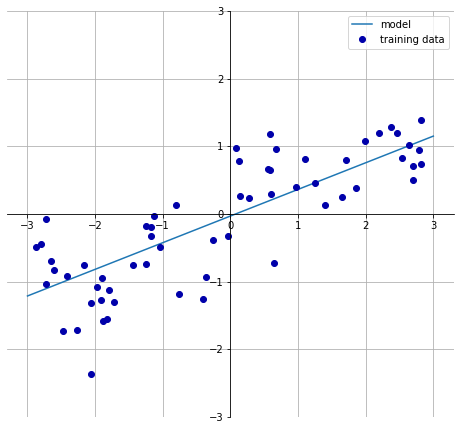

In [99]:
import mglearn

mglearn.plots.plot_linear_regression_wave()

## statsmodels 이용

In [77]:
import statsmodels.api as sm

X = sm.add_constant(X)  # OLS 분석을 위해 상수항을 만들어 주어야 함 
reg = sm.OLS(y, X)    ## OLS:선형회귀, Logit: 로지스틱회귀

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [78]:
reg_fit = reg.fit()
print(reg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:           PersonalLoan   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     285.3
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:05:55   Log-Likelihood:                 236.48
No. Observations:                5000   AIC:                            -449.0
Df Residuals:                    4988   BIC:                            -370.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2324      0.07

## sklearn 이용

### 데이터 전처리
* 학습 / 테스트데이터 분할
* 독립변수 표준화 수행

In [89]:
df_Boston = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BigMining/BostonHousing.csv")

display(df_Boston.head(3))
df_Boston.describe()  #변수 scale확인
print(df_Boston.isnull().sum())  #결측치 확인

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,'CAT. MEDV'
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296,15.300,396.900,4.980,24.000,0
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242,17.800,396.900,9.140,21.600,0
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242,17.800,392.830,4.030,34.700,1


CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT          0
MEDV           0
'CAT. MEDV'    0
dtype: int64


In [90]:
#Cat.medv는 medv가 30,000 (단위 1,000$)이므로 제거
#종속변수 집값 (medv), 나머지 독립변수

y = df_Boston["MEDV"]
X = df_Boston.iloc[:,0:-2]
display(X.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296,15.300,396.900,4.980
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242,17.800,396.900,9.140
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242,17.800,392.830,4.030
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222,18.700,394.630,2.940
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222,18.700,396.900,5.330


In [91]:
# 학습 / 테스트데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [98]:
# 독립변수 표준화 
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
s_scaler.fit_transform(X_train)
s_scaler.transform(X_test)

array([[-0.39680933, -0.50032012, -1.00711147, ..., -0.77195078,
         0.42887165, -0.48121032],
       [-0.40079621,  1.2294987 , -0.66439105, ..., -0.32270256,
         0.44418004, -1.25709448],
       [-0.39523443, -0.50032012,  2.43316256, ...,  0.80041799,
         0.36993437,  0.79033849],
       ...,
       [ 1.1779666 , -0.50032012,  1.03323679, ...,  0.84534281,
        -3.5124912 ,  1.23390203],
       [-0.40131065, -0.50032012, -0.94321444, ...,  0.08162084,
         0.43422959,  0.05669848],
       [-0.39643252, -0.50032012,  0.26792466, ...,  0.17147048,
         0.29470458, -0.49529171]])

In [93]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_predict = lr_model.predict(X_test)

In [126]:
train_performance = lr_model.score(X_train, y_train)
test_performance = lr_model.score(X_test, y_test)
print("집값 예측결과: \n", y_predict[0:10])
print("훈련 성능: {}   테스트 성능: {}".format(train_performance, test_performance))
print(X_train.columns)

np.set_printoptions(suppress=True, precision =2) #넘파이 결과가 지수형태로 나와서 보기 안좋아서 지수 제한
print("회귀식: {}  절편: {}".format(lr_model.coef_, lr_model.intercept_))

#독립변수가 종속변수의 변동을 66.9% 설명
#그러나, 머신러닝에서는 MAE, RMSE를 더 중요한 성능으로 고려함

집값 예측결과: 
 [27.021 34.882 14.398 21.033 16.339 16.733 16.756 14.673 22.429 19.078]
훈련 성능: 0.7508856358979672   테스트 성능: 0.668759493535633
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
회귀식: [ -0.11   0.03   0.04   2.78 -17.2    4.44  -0.01  -1.45   0.26  -0.01
  -0.92   0.01  -0.51]  절편: 30.246750993923865


In [117]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#mean_absolute_error(실제, 예측)
print("MAE:", mean_absolute_error(y_test, y_predict ))
print("RMSE:", mean_squared_error(y_test, y_predict))

#MAE기준으로 해석하면, 회귀식이 평균적으로 예측한 집값은 실제값과 약 $3,189 정도 오차가 있음. 

MAE: 3.1890919658878323
RMSE: 24.291119474973442


### Feature Engineering
* 변수를 제곱, 삼제곱, 곱 등을 통해서 다양한 조합으로 구성
* => 변수의 수가 늘어나 다양한 곡선을 적합시킬 수 있으나 과대적합문제 나타날 수 있음



In [120]:
from sklearn.preprocessing import PolynomialFeatures

poly =PolynomialFeatures(degree = 2, include_bias = False)  #2제곱까지, include_bias = False 절편은 포함 안함. 회귀식에서 자동으로 포함하니 불필요
poly.fit(X_train)
train_poly = poly.transform(X_train)
test_poly = poly.transform(X_test)

print(train_poly.shape)
print(test_poly.shape)
poly.get_feature_names()

(404, 104)
(102, 104)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x7^2',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x8^2',
 'x8 x9',
 'x8 x10',
 'x8 x11',
 'x8 x12',
 'x9^2',
 'x9 x10',
 'x9 x11',
 'x9 x12',
 'x10^2',
 'x10 x11',
 'x10 x12',
 '

In [125]:
lr_model2 = LinearRegression()
lr_model2.fit(train_poly, y_train)
y_predict = lr_model2.predict(test_poly)
train_performance2 = lr_model2.score(train_poly, y_train)
test_performance2 = lr_model2.score(test_poly, y_test)
print("훈련 성능: {}   테스트 성능: {}".format(train_performance2, test_performance2))
print("MAE:", mean_absolute_error(y_test, y_predict ))
print("RMSE:", mean_squared_error(y_test, y_predict))

#R2가 향상되었으며, 오차율이 줄어듦
#실제 집값과 예측 집값이 평균 $2,574 정도 차이남
#그러나, degree가 늘어날수록 과적합 문제가 발생됨. 94%의 R2 는 대단히 높은 수치임

훈련 성능: 0.9409317027113501   테스트 성능: 0.8055829448308779
MAE: 2.5748356262325123
RMSE: 14.257338166440945


In [127]:
# 구체적인 모형의 도출
import numpy as np
np.set_printoptions(suppress=True, precision =2) #넘파이 결과가 지수형태로 나와서 보기 안좋아서 지수 제한

print("회귀계수: {}  절편:{}".format(lr_model2.coef_, lr_model2.intercept_))

회귀계수: [ -7.25   0.66  -4.72  36.77 285.82  17.88   0.66  -4.06   2.63   0.
   7.65   0.14  -0.19   0.     0.08   0.56   2.58  -2.03   0.19  -0.
  -0.07   0.31  -0.04   0.65  -0.     0.03  -0.    -0.    -0.04  -1.37
  -0.     0.    -0.02  -0.02   0.    -0.     0.    -0.01   0.05  -0.03
  -0.22   0.34   0.     0.15  -0.03   0.    -0.02   0.    -0.02  36.77
 -36.67  -5.27  -0.03  -0.91   0.14  -0.01  -0.84   0.01  -0.27 -98.82
  -8.83  -0.01  14.82  -2.1    0.29 -14.5   -0.02   1.01   1.17  -0.07
  -0.35  -0.19  -0.01  -0.54  -0.01  -0.01  -0.     0.     0.02  -0.
   0.    -0.    -0.01   0.5    0.01  -0.    -0.27  -0.     0.04  -0.12
   0.01  -0.16   0.    -0.03  -0.     0.01  -0.    -0.     0.02   0.
   0.01  -0.    -0.     0.02]  절편:-218.09134651265748


### Ridge & Lasso 회귀분석 

In [130]:
from sklearn.linear_model import Ridge  #Lasso는 Ridge를 Lasso로만 변경

Ridge = Ridge(alpha = 0.3)
Ridge.fit(train_poly, y_train)
y_predict = Ridge.predict(test_poly)
train_performance3 = Ridge.score(train_poly, y_train)
test_performance3 = Ridge.score(test_poly, y_test)
print("훈련 성능: {}   테스트 성능: {}".format(train_performance3, test_performance3))
print("MAE:", mean_absolute_error(y_test, y_predict ))
print("RMSE:", mean_squared_error(y_test, y_predict))

print("회귀계수: {}  절편:{}".format(Ridge.coef_, Ridge.intercept_))

#학습 데이터에 대한 성능이 약간 줄어 과적합 조금 완화됨 
#반면, 테스트 데이터에 대한 성능은 다소 높아짐
#MAE도 줄어, 회귀모형의 예측 가격은 실제 집 가격과 약 $2,484 차이가 남 

훈련 성능: 0.9363815887828271   테스트 성능: 0.8154873730152803
MAE: 2.4849277479356258
RMSE: 13.53100897763899
회귀계수: [-3.    0.14 -2.43  2.8   0.27  5.42  0.79 -2.03  2.53 -0.   -1.43  0.17
 -0.71  0.    0.03  0.4   3.07 -1.86  0.2  -0.   -0.06  0.25 -0.03  0.36
 -0.    0.03  0.   -0.   -0.03 -0.29 -0.01  0.   -0.02 -0.01  0.    0.
  0.   -0.01  0.03 -0.35  0.97  0.18  0.    0.06  0.    0.   -0.06  0.
 -0.02  2.8  -3.03 -4.54  0.06  0.64 -0.77  0.01  1.02  0.03 -0.58 -0.19
  1.1  -0.29  7.13 -1.21  0.05 -2.   -0.02  1.27  1.28 -0.07 -0.13 -0.33
 -0.01 -0.32 -0.01 -0.    0.    0.    0.01 -0.   -0.   -0.   -0.01  0.39
  0.   -0.   -0.14 -0.01  0.04 -0.13  0.01 -0.09  0.   -0.03 -0.    0.01
 -0.   -0.    0.04  0.    0.02 -0.   -0.    0.02]  절편:-41.22801081450184


## 로지스틱 회귀분석

In [132]:
# 데이터 셋 설정 (Universal Bank에서 대출 캠페인에 반응한 사람)
# Universal Bank에서 대출 캠페인에 반응한 사람 (종속: Personal Loan, index 7)

df_bank = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BigMining/UniversalBank.csv")
display(df_bank.head(3))
display(df_bank.describe())
print(df_bank.info())

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.600,1,0,0,1,0,0,0
1,45,19,34,3,1.500,1,0,0,1,0,0,0
2,39,15,11,1,1.000,1,0,0,0,0,0,0


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000
mean,45.338,20.105,73.774,2.396,1.938,1.881,56.499,0.096,0.104,0.060,0.597,0.294
std,11.463,11.468,46.034,1.148,1.748,0.840,101.714,0.295,0.306,0.238,0.491,0.456
min,23.000,-3.000,8.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,35.000,10.000,39.000,1.000,0.700,1.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,45.000,20.000,64.000,2.000,1.500,2.000,0.000,0.000,0.000,0.000,1.000,0.000
75%,55.000,30.000,98.000,3.000,2.500,3.000,101.000,0.000,0.000,0.000,1.000,1.000
max,67.000,43.000,224.000,4.000,10.000,3.000,635.000,1.000,1.000,1.000,1.000,1.000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Experience         5000 non-null   int64  
 2   Income             5000 non-null   int64  
 3   Family             5000 non-null   int64  
 4   CCAvg              5000 non-null   float64
 5   Education          5000 non-null   int64  
 6   Mortgage           5000 non-null   int64  
 7   PersonalLoan       5000 non-null   int64  
 8   SecuritiesAccount  5000 non-null   int64  
 9   CDAccount          5000 non-null   int64  
 10  Online             5000 non-null   int64  
 11  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB
None


In [133]:
df_bank["PersonalLoan"].value_counts()

0    4520
1     480
Name: PersonalLoan, dtype: int64

In [134]:
y = df_bank["PersonalLoan"].astype(bool)
X = df_bank.drop("PersonalLoan", axis = 1)
print(X.columns)

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard'],
      dtype='object')


In [135]:
# 학습데이터 / 테스트 데이터 분할
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

# X표준화
scaler = StandardScaler()
sX_train = scaler.fit_transform(X_train) 
sX_test = scaler.transform(X_test)
np.set_printoptions(suppress=True, precision =2) #넘파이 결과가 지수형태로 나와서 보기 안좋아서 지수 제한

print("평균:", np.mean(sX_train, axis =0))
print("표준편차:", np.std(sX_train, axis =0))

평균: [-0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.]
표준편차: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### 불균형 데이터임을 고려안한 경우

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression()  # 버전 2. (class_weight= "balanced" )
LR.fit(sX_train, y_train)
prediction = LR.predict(sX_test)
#print("예측결과:\n", prediction)

train_accuracy = LR.score(sX_train, y_train)
test_accuracy = LR.score(sX_test, y_test)
print("훈련성능: {}   테스트성능: {}".format(train_accuracy, test_accuracy))
np.unique(prediction, return_counts = True)


훈련성능: 0.9515   테스트성능: 0.955


(array([False,  True]), array([916,  84]))

In [137]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction)  #  labels=[False, True]
print("Confusion matrix:\n", conf_mat)
print(classification_report(y_test, prediction, target_names=["F", "T"]))

Confusion matrix:
 [[883  12]
 [ 33  72]]
              precision    recall  f1-score   support

           F       0.96      0.99      0.98       895
           T       0.86      0.69      0.76       105

    accuracy                           0.95      1000
   macro avg       0.91      0.84      0.87      1000
weighted avg       0.95      0.95      0.95      1000



### 불균형 데이터를 고려하여 class_weight = "balanced"로 설정

In [138]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(class_weight= "balanced" )  #class_weight = "balanced"   ,  class_weight = {False: 0.2, True:0.8}
LR.fit(sX_train, y_train)
prediction = LR.predict(sX_test)
#print("예측결과:\n", prediction)

train_accuracy = LR.score(sX_train, y_train)
test_accuracy = LR.score(sX_test, y_test)
print("훈련성능: {}   테스트성능: {}".format(train_accuracy, test_accuracy))
np.unique(prediction, return_counts = True)

훈련성능: 0.8885   테스트성능: 0.892


(array([False,  True]), array([803, 197]))

In [143]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

conf_mat = confusion_matrix(y_true=y_test, y_pred=prediction) # labels=[False, True]

print("Confusion matrix:\n", conf_mat)
print(classification_report(y_test, prediction, target_names=["F", "T"]))

Confusion matrix:
 [[795 100]
 [  8  97]]
              precision    recall  f1-score   support

           F       0.99      0.89      0.94       895
           T       0.49      0.92      0.64       105

    accuracy                           0.89      1000
   macro avg       0.74      0.91      0.79      1000
weighted avg       0.94      0.89      0.91      1000

